In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load all data

In [16]:
# true simulation
acc_true = np.loadtxt('sim_data/acceleration-3k.txt')
vel_true = np.loadtxt('sim_data/velocity-3k.txt')
pos_true = np.loadtxt('sim_data/displacement-3k.txt')
d_sim_data = {'ax': acc_true, 'ay': np.zeros(len(acc_true)), 'az': np.zeros(len(acc_true)),
              'vx': vel_true, 'vy': np.zeros(len(vel_true)), 'vz': np.zeros(len(vel_true)),
              'sx': pos_true, 'sy': np.zeros(len(pos_true)), 'sz': np.zeros(len(pos_true))}
data_true = pd.DataFrame(data=d_sim_data)
# IMU simulation
data_imu1  = pd.read_csv('sim_data/run11_data.csv')
data_imu2  = pd.read_csv('sim_data/run12_data.csv')
data_imu4  = pd.read_csv('sim_data/run14_data.csv')
data_imu8  = pd.read_csv('sim_data/run18_data.csv')
data_imu16 = pd.read_csv('sim_data/run116_data.csv')

## Plot some readings

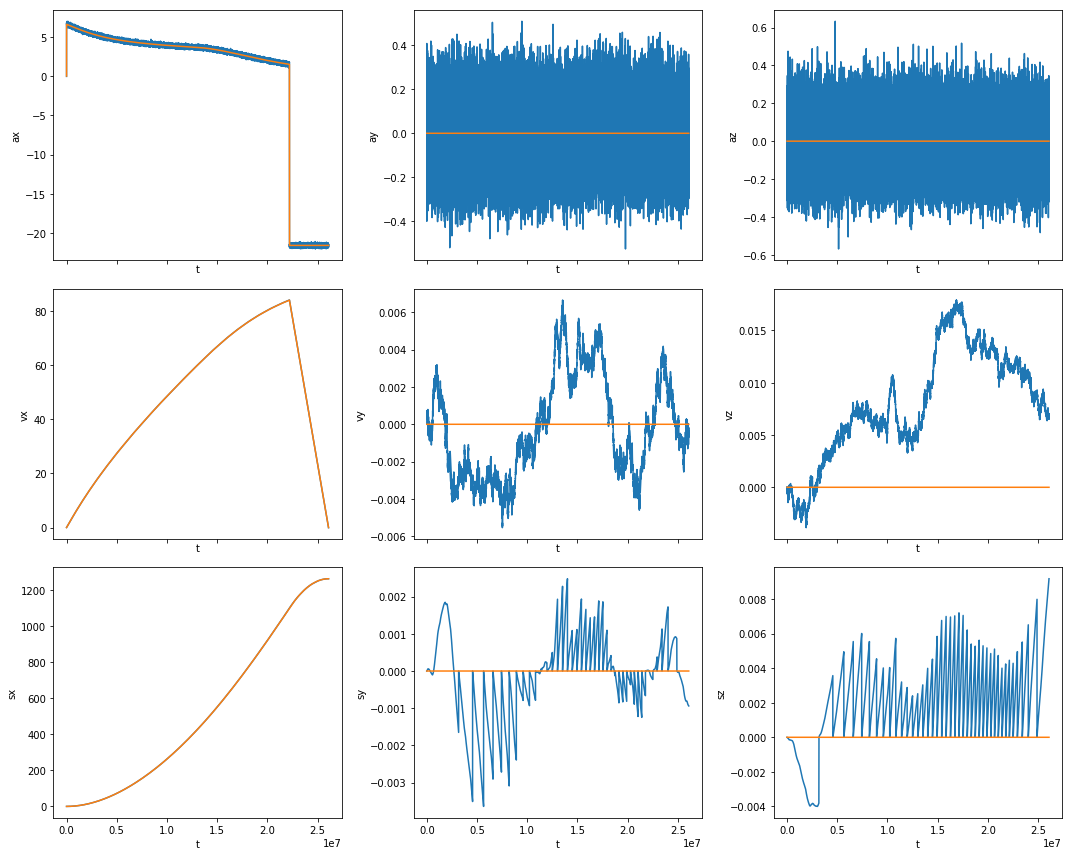

In [19]:
data_imuN = data_imu16

fig, axs = plt.subplots(3, 3, figsize=(15,12), sharex=True)
plot_vals = np.array(data_true.columns).reshape(3,3)
for i, val in enumerate(plot_vals):
    for j, val_axis in enumerate(val):
        ax = axs[i,j]
        ax.plot(data_imuN['t'], data_imuN[val_axis])
        ax.plot(data_imuN['t'], data_true[val_axis])
        ax.set_ylabel(val_axis)
        ax.set_xlabel('t')
fig.tight_layout()
plt.show()

## Compare deviations

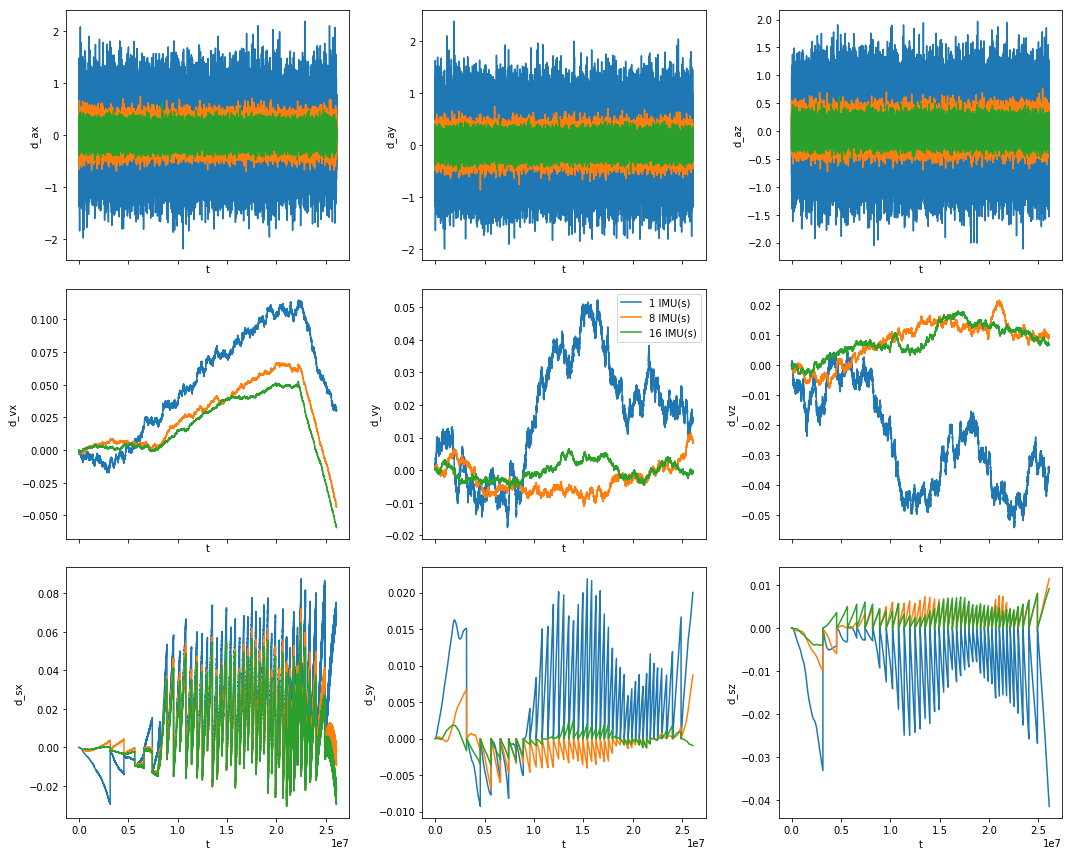

In [26]:
data_to_compare = {'1': data_imu1, '8': data_imu8, '16': data_imu16}

fig, axs = plt.subplots(3, 3, figsize=(15,12), sharex=True)
plot_vals = np.array(data_true.columns).reshape(3,3)
for nImus in data_to_compare:
    data_imuN = data_to_compare[nImus] 
    for i, val in enumerate(plot_vals):
        for j, val_axis in enumerate(val):
            ax = axs[i,j]
            ax.plot(data_imuN['t'], data_imuN[val_axis] - data_true[val_axis], label='%s IMU(s)'%nImus)
            ax.set_ylabel("d_%s"%val_axis)
            ax.set_xlabel('t')
axs[1,1].legend()
fig.tight_layout()
plt.show()